<a href="https://colab.research.google.com/github/PhoenixCC0722/Journey_to_become_DataScientist/blob/main/Chapter6_ML_Kopie_von_4_analysing_k_means__exploring_the_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing k-means: exploring the clusters

Ready to unlock insights from your k-means clusters? This code-along dives into analysing average values within each cluster and visualising them on a radar chart.  This approach will help you decipher the unique characteristics of each cluster.

---
##1.&nbsp; Import libraries and files 💾

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import plotly.graph_objects as go

In [2]:
# ID of the Google Sheet for student food preferences
sheet_id = "1iSM0Mr6rFI1WH5wAGN1R-7hsZeYi64fyS0IO0UzLzJY"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

# Read the CSV data into a Pandas DataFrame
# Set the index column to `student` and only read the first 15 rows
foods_df = pd.read_csv(url,
                       index_col="student")

# Drop the `favorite_color` column
foods_df = foods_df.drop(columns="favorite_color")

---
##2.&nbsp; Scale the data 📐
In this notebook, we are only using the MinMaxScaler to keep the code simple and focus on clustering with KMeans. However, we encourage you to experiment with other scalers, as they can have a impact on the clusters produced by KMeans.

In [3]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(foods_df)

---
##3.&nbsp; Cluster with K-means 🫧
When we cluster with K-means, there is no visible change to the DataFrame. However, when we call the `.fit()` method, Scikit-learn performs all the necessary calculations for the clusters and stores them in the `my_kmeans` variable. We can extract the cluster assignment for each student using the `.labels_` attribute. Below, we add a new column to the DataFrame containing the cluster assignment for each student, which allows us to better understand the results.


In [4]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 5, # you always choose the number of k here
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(scaled_features_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
scaled_features_df["cluster"] = clusters

scaled_features_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age,cluster
student,,,,,,,,,,,
Arianne,1.000000,1.0,1.0,1.0,1.0,0.571429,0.500,1.0,0.0,0.048544,3
Andrea,1.000000,1.0,0.1,0.1,1.0,0.857143,1.000,0.4,0.2,0.000000,1
Daniel,1.000000,1.0,1.0,0.0,0.3,1.000000,1.000,1.0,1.0,0.213592,0
Josef,0.222222,0.3,0.9,0.9,0.5,0.285714,0.750,1.0,0.7,0.233010,3
Kaj,0.222222,1.0,0.7,0.8,0.8,1.000000,0.750,1.0,0.9,0.155340,0
Katherine,0.444444,0.0,0.9,0.5,1.0,0.714286,1.000,0.5,0.8,0.203883,3
Leslie,0.666667,0.3,0.3,0.5,0.3,0.571429,0.625,0.5,0.1,0.145631,1
Merry,0.777778,0.5,0.0,0.0,0.2,0.857143,0.750,0.0,0.4,0.126214,1
Perry,0.777778,0.0,0.5,0.0,0.0,0.714286,0.250,0.0,0.0,0.116505,1


###3.1.&nbsp; Who's sitting with who for dinner?
Who's in each cluster?

In [5]:
scaled_features_df[["cluster"]].sort_values(by='cluster')

,cluster
student,
Daniel,0
Kaj,0
Tim,1
Andrea,1
susmitha,1
Leslie,1
Merry,1
Perry,1
Feng,1


Are these clusters consistent with the original food preferences? Check the original DataFrame to see what you think.

---
## 4.&nbsp; Cluster analysis


#### 4.1.&nbsp; Column averages
By grouping the clusters and looking at the average score for each column, you can learn more about the different groups of students and their food preferences. For example, you might find that one group of students prefers healthy foods like broccoli and peas, while another group prefers more processed foods like hamburgers. You might also find that some groups of students have a more diverse range of food preferences than others.

In [6]:
scaled_features_df.groupby(by="cluster").mean()

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
cluster,,,,,,,,,,
0,0.611111,1.000000,0.850000,0.400000,0.550000,1.000000,0.875000,1.000000,0.950000,0.184466
1,0.679012,0.466667,0.288889,0.100000,0.433333,0.666667,0.625000,0.233333,0.155556,0.102481
2,0.583333,0.525000,0.600000,0.525000,0.500000,0.142857,0.343750,0.275000,0.175000,0.682039
3,0.500000,0.533333,0.916667,0.833333,0.683333,0.500000,0.791667,0.550000,0.500000,0.122977
4,0.074074,0.166667,0.100000,0.133333,0.600000,0.714286,0.708333,0.800000,0.800000,0.229773


#### 4.2.&nbsp; Radar chart
Having calculated the average score for each food by cluster, we now have a matrix that we can analyse. However, as data scientists with coding skills, we can visualise this information to gain a clearer understanding of why certain people are clustered together and why others aren't.

Visualising the data can help us to identify patterns and trends that would be difficult to see in a matrix. For example, we might be able to see that certain foods are consistently grouped together, while others are more spread out. This could suggest that there are different subgroups of students with different dietary preferences.

We can also use visualisation to identify outliers. For example, we might find a few students who have very different food preferences than the rest of the group. This could be due to a variety of factors, such as cultural background, medical conditions, or personal preferences.

In [7]:
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

# State the label for each arm of the chart
categories = scaled_features_df.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(scaled_features_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[0]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[1]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[2]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[3]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[4]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[5]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[6]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[7]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[8]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[9]].mean()]
                  # Bonus: see if you can turn this code for `cluster_means` into a list comprehension

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean food preferences by cluster',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

We can also visualise them in a grid, i.e. each plot separated.

In [8]:
from plotly.subplots import make_subplots

# Create subplots: 3 rows, 2 columns (to accommodate all 5 clusters)
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"),
    specs=[[{'type': 'polar'}, {'type': 'polar'}],
           [{'type': 'polar'}, {'type': 'polar'}],
           [{'type': 'polar'}, {'type': 'polar'}]]
)

# Add each scatterpolar to the corresponding subplot
fig.add_trace(scatter_objects[0], row=1, col=1)
fig.add_trace(scatter_objects[1], row=1, col=2)
fig.add_trace(scatter_objects[2], row=2, col=1)
fig.add_trace(scatter_objects[3], row=2, col=2)
fig.add_trace(scatter_objects[4], row=3, col=1)

# Update the layout for the figure
fig.update_layout(
    title_text='Radar charts of mean food preferences by cluster',
    height=1000,
    width=800,
    showlegend=True
)

# Show the plot
fig.show()

---
##   5.&nbsp; Challenge: apply this to the spotify dataset 😃
Now that you've mastered using average values and radar charts to analyse k-means clusters, put your newfound skills to the test! Group the Spotify data into clusters using k-means, calculate the average values for each cluster, and create radar charts to visualise the trends.  Can you identify distinct listening moods or preferences based on the resulting charts?



##    5.1 Import the Library and the dataset



In [9]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import plotly.graph_objects as go

In [10]:
# you need first download this sheet to local folder and then upload to google konto, then open the file in Google sheet.
# google sheet address
# https://docs.google.com/spreadsheets/d/1fnIo7Ozlr-o0Us4t6WSr81FzIgl03sG_ZptrNSqVDCM/edit#gid=1481626517
# ID of the Google Sheet for 5000 songs
sheet_id = "1fnIo7Ozlr-o0Us4t6WSr81FzIgl03sG_ZptrNSqVDCM"
# title of the google sheet
sheet_name = "1481626517"
# URL to download the Google Sheet as a CSV
# then change the sheet permission to anyone with the link has right to change or modify it.
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"
songs_df = pd.read_csv(url, index_col='name')
# how to read CSV File without Unnamed Index Column using index_col=0 while reading CSV.
songs_df.head()

,Unnamed: 0,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,0,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,NaN,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Saudade De Bahia,1,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,NaN,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
"Canta Canta, Minha Gente",2,Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,NaN,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Mulher Eu Sei,3,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,NaN,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Rosa Morena,4,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,NaN,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


## 5.2    Data cleaning, drop the unuseful information columns in the DataFrame.

In [11]:
# data cleaning, delete the irrelavent information columns
# Drop the 'artist', 'mode', 'type', 'duration_ms', 'time_signature', 'id', 'html' - with intuition
songs_df = songs_df.drop(columns=['Unnamed: 0', 'artist', 'mode', 'type', 'duration_ms', 'time_signature', 'id', 'html'])

## 5.3    Data Scaling

In [12]:
# Initialise the transformer (optionally, set parameters)
scaler = PowerTransformer().set_output(transform="pandas") # If you want to explore set_output further https://blog.scikit-learn.org/technical/pandas-dataframe-output-for-sklearn-transformer/
# Transform the foods_df DataFrame
scaled_features_df = scaler.fit_transform(songs_df)

## 5.4 Cluster with K-means

*  5.4.1 -- Calculated the optimal number of clusters by applying the Silhouette method (See Notebook 3), which is **K=3** (This score measures how well each point is assigned to its cluster, with higher scores indicating better clustering.)

In [13]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 3, # you always choose the number of k here
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(scaled_features_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
scaled_features_df["cluster"] = clusters

scaled_features_df.tail()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,,,,,,,,,,,
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",-1.392809,-1.695160,-0.526054,-1.867615,-0.521426,1.485832,1.414598,-0.901756,-1.475249,-1.099412,1
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",-1.452979,-1.648739,0.305608,-1.751722,-0.639506,1.438799,1.086660,-1.164475,-1.622766,-1.296898,1
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",-1.994836,-1.785392,1.018029,-2.914038,-0.670914,1.509279,1.546148,-1.012903,-1.628255,-1.800759,1
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",-1.687319,-1.760617,-0.230296,-2.264926,-0.730868,1.460763,1.207265,-0.442332,-1.506370,-2.006328,1
"Ravel: Boléro, M. 81",-0.726526,-1.723901,0.045455,-1.952512,-1.149736,1.376174,1.178181,1.126891,-0.637360,-2.147884,1




*   5.4.2 Arrange the rows with the same cluster attribute 'sit at the same table'.


In [14]:
scaled_features_df[["cluster"]].sort_values(by='cluster')

,cluster
name,
"All of You (feat. John Coltrane, Red Garland, Paul Chambers & Philly Joe Jones)",0
Spring nicht,0
Frauen regier'n die Welt,0
Ernten was wir säen,0
Ein Stern (der deinen Namen trägt) - Party Mix,0
...,...
Malevolent Creation,2
Sacrificial Annihilation,2
Mental Decay,2


***Quesion*** -- how to define the three different clusters? Classic, Rock, Piano or Sport? Which feature thus become the primary determing component to decide the clustering?

## 5.5 Cluster analysis



*   5.5.5 Column averages



In [15]:
# grouping the clusters and then looking at the average score for each column, to check out the preference of each cluster.
scaled_features_df.groupby(by="cluster").mean()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,
0,0.697049,0.064317,-0.019256,0.420280,-0.073801,-0.065929,-0.643006,-0.018130,0.662315,0.101810
1,-0.583135,-1.457068,-0.013976,-1.357379,-0.689715,1.385903,0.662908,-0.244845,-0.739675,-0.453311
2,-0.960374,1.016366,0.050220,0.212938,0.693405,-0.957044,0.787499,0.229722,-0.766373,0.149616


***Quesion*** -- how to those songs were clustered and to figure out the primary features used for clustering.


*   Step 1: Examine Cluster Centers, in the table above, Each row represents a cluster center, and each column represents a feature.
*   Step 2: Identify Key Features for Clustering. Check the range of the values in each column, as the values from 'tempo' are quite close, suggesting it is less important for clustering.
*   Step 3: Determine Primary Features
Based on the analysis above, the primary features contributing to the clustering likely include: energy, acousticness, loudness, danceability,
speechiness, valence, instrumentalness.
*   Step 4: Feature weights












*   5.5.6 Suggested clusters summarization
1.   **Cluster 0**

Characteristics:

High energy and speechiness suggest lively and intense tracks.
Low danceability and valence indicate less danceable and more negative emotional tone.
High instrumentalness suggests many instrumental tracks.

Proposed Name: **"Energetic Instrumentals" or "Intense Speech"** (**Rock 'n' Roll**)

2.  **Cluster 1**

Characteristics:

Very low energy and loudness suggest calm and quiet tracks.
High acousticness and instrumentalness indicate many acoustic and instrumental tracks.
Low valence and speechiness suggest a more somber and less speech-heavy mood.

Proposed Name: **"Calm Acoustic" or "Mellow Instrumentals"** (**Blues**)

3.   **Cluster 2**

Characteristics:

High danceability and valence suggest positive and danceable tracks.
Moderate energy and loudness indicate a balanced intensity.
Low instrumentalness suggests vocal-heavy tracks.

Proposed Name: **"Dance Pop" or "Uplifting Vocals"** (**Dance Pop**)


**Summary**
1. Of course, number of cluster = 3 would be too less for this more than 5000 songs DataFrame. Suggested like 20 Playlist would be good for this analysis. so try (n_clusters = 20).

2. With the small cluster number we can see from the filtering, the column like 'key', 'liveness' and 'tempo' can be also excluded from the data cleaning step.



---


 ##  6. Radar Chart



*   6.1 Data cleaning



In [16]:
sheet_id = "1fnIo7Ozlr-o0Us4t6WSr81FzIgl03sG_ZptrNSqVDCM"
# title of the google sheet
sheet_name = "1481626517"
# URL to download the Google Sheet as a CSV
# then change the sheet permission to anyone with the link has right to change or modify it.
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"
songs_original_df = pd.read_csv(url, index_col='name')

In [17]:
songs_original_df.tail()

,Unnamed: 0,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,,,,,,,,,,,,,,,,,,
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",5230,Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715,0.0832,0.0655,87.906,NaN,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",5231,Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426,0.0694,0.0355,83.134,NaN,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",5232,Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969,0.0772,0.0344,71.573,NaN,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",5233,Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505,0.1110,0.0591,67.109,NaN,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...
"Ravel: Boléro, M. 81",5234,Maurice Ravel,0.3540,0.04870,5,-24.568,1,0.0323,0.783,0.484,0.2840,0.2530,64.120,NaN,948787,3,7E1ErYYCn0lYjHODZ1qGuB,https://open.spotify.com/track/7E1ErYYCn0lYjHO...


In [18]:
songs_df_01 = songs_original_df.drop(columns=['Unnamed: 0', 'artist', 'mode', 'type', 'duration_ms', 'time_signature', 'id', 'html'])
songs_df = songs_df_01.drop(columns=['key', 'liveness', 'tempo'])

In [19]:
songs_df.tail()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence
name,,,,,,,
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,-23.390,0.0473,0.917,0.715,0.0655
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,-21.873,0.0442,0.855,0.426,0.0355
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,-42.959,0.0434,0.951,0.969,0.0344
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.1330,0.02080,-29.443,0.0419,0.883,0.505,0.0591
"Ravel: Boléro, M. 81",0.3540,0.04870,-24.568,0.0323,0.783,0.484,0.2530




*   6.2 Data Scaling


In [20]:
# Initialise the transformer (optionally, set parameters)
scaler = PowerTransformer().set_output(transform="pandas") # If you want to explore set_output further https://blog.scikit-learn.org/technical/pandas-dataframe-output-for-sklearn-transformer/
# Transform the foods_df DataFrame
scaled_features_df = scaler.fit_transform(songs_df)



*   6.3 Cluster mit K-means



In [22]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 10, # you always choose the number of k here
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(scaled_features_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
scaled_features_df["cluster"] = clusters

scaled_features_df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,cluster
name,,,,,,,,
Se Eu Quiser Falar Com Deus,0.671946,-1.366485,-0.872257,0.203888,1.284281,-0.773661,-0.423042,6
Saudade De Bahia,1.072584,-1.037604,-0.806268,-1.043567,0.242058,-0.774204,0.921178,2
"Canta Canta, Minha Gente",1.601005,0.100674,-0.574711,1.977698,0.916119,-0.773616,1.533152,4
Mulher Eu Sei,0.895392,-1.721861,-1.425873,-0.528874,1.457701,-0.773835,0.376164,6
Rosa Morena,0.638825,-1.620882,-1.580209,-0.893477,1.485119,-0.770944,-0.055938,6
Desafinado,-0.221078,-1.577112,-1.366195,0.051643,1.495675,0.281550,0.021035,6
Madalena,0.752554,-1.469093,-0.958937,-0.268099,1.517191,1.065409,0.893543,2
O Meu Amor É Glòria,-0.046932,0.113641,-0.523204,1.998287,1.286549,-0.773686,1.481135,4
Brigas Nunca Mais,0.842931,-0.600045,-0.636168,-0.808851,0.796170,-0.162907,0.759455,2


**Question:** How can we distinguish these 10 playlist and name them?



*   6.4 Radar Chart



In [24]:
scaled_features_df['cluster'].unique()

array([6, 2, 4, 5, 8, 7, 9, 3, 1, 0], dtype=int32)

In [25]:
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

# State the label for each arm of the chart
categories = scaled_features_df.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(scaled_features_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[0]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[1]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[2]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[3]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[4]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[5]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[6]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[7]].mean()]
                  # Bonus: see if you can turn this code for `cluster_means` into a list comprehension

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean food preferences by cluster',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

Let's just visulize it in a single grid

In [29]:
from plotly.subplots import make_subplots

# Create subplots: 3 rows, 2 columns (to accommodate all 10 clusters)
fig = make_subplots(
    rows=5, cols=2,
    subplot_titles=("Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6", "Cluster 7", "Cluster 8", "Cluster 9"),
    specs=[[{'type': 'polar'}, {'type': 'polar'}],
           [{'type': 'polar'}, {'type': 'polar'}],
           [{'type': 'polar'}, {'type': 'polar'}],
           [{'type': 'polar'}, {'type': 'polar'}],
           [{'type': 'polar'}, {'type': 'polar'}],]
)

# Add each scatterpolar to the corresponding subplot
fig.add_trace(scatter_objects[0], row=1, col=1)
fig.add_trace(scatter_objects[1], row=1, col=2)
fig.add_trace(scatter_objects[2], row=2, col=1)
fig.add_trace(scatter_objects[3], row=2, col=2)
fig.add_trace(scatter_objects[4], row=3, col=1)
fig.add_trace(scatter_objects[5], row=3, col=2)
fig.add_trace(scatter_objects[6], row=4, col=1)
fig.add_trace(scatter_objects[7], row=4, col=2)
fig.add_trace(scatter_objects[8], row=5, col=1)
fig.add_trace(scatter_objects[9], row=5, col=2)

# Update the layout for the figure
fig.update_layout(
    title_text='Radar charts of mean food preferences by cluster',
    height=1000,
    width=800,
    showlegend=True
)

# Show the plot
fig.show()

In [30]:
# grouping the clusters and then looking at the average score for each column, to check out the preference of each cluster.
scaled_features_df.groupby(by="cluster").mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence
cluster,,,,,,,
0,-0.942774,1.141254,0.429431,1.020445,-0.957666,-0.438226,-0.863833
1,-1.221749,1.036842,-0.016017,0.817928,-0.986083,1.375649,-0.878262
2,0.596880,-0.625951,-0.369942,-0.698907,0.881046,-0.518286,0.994830
3,0.244264,0.102573,0.570511,-0.713864,-0.540367,-0.719354,-0.322907
4,1.141411,-0.128883,0.262896,1.415575,0.096243,-0.707014,0.850612
5,-0.886459,-1.575271,-1.686644,-0.656201,1.466323,1.422765,-1.097325
6,-0.254627,-1.236063,-0.745012,-0.780378,1.265858,-0.663302,-0.423994
7,0.884670,0.389654,0.610495,-0.594865,-0.378439,-0.707543,1.088624
8,0.000239,0.613476,0.334233,-0.410929,-0.777009,1.249240,0.125640


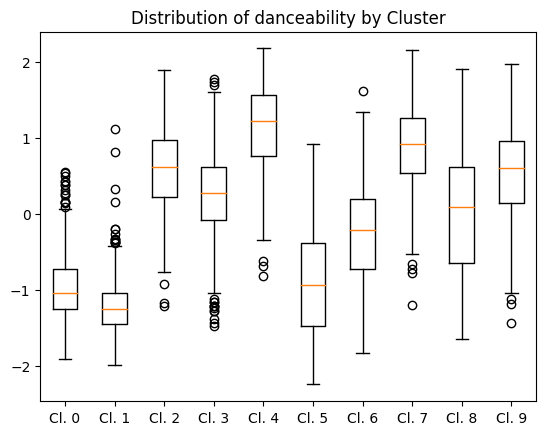

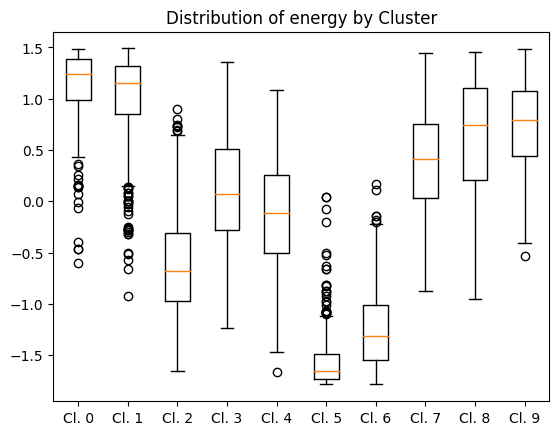

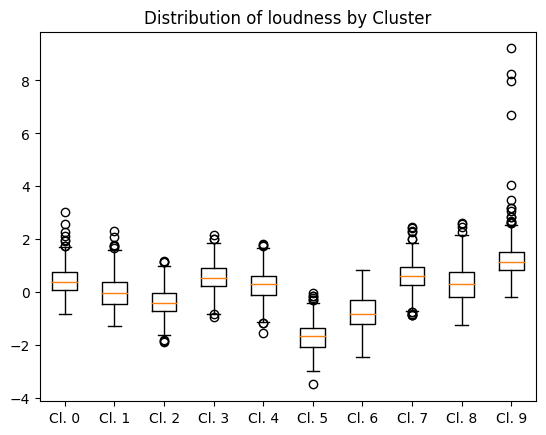

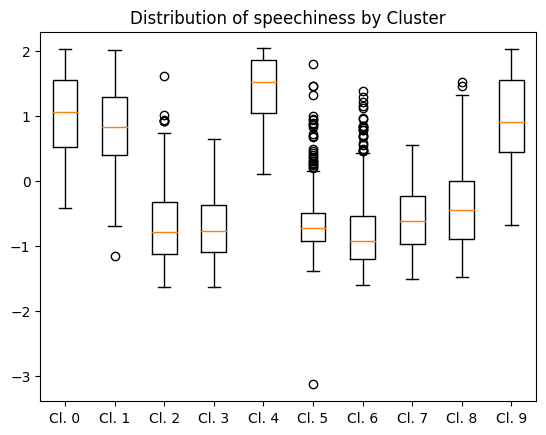

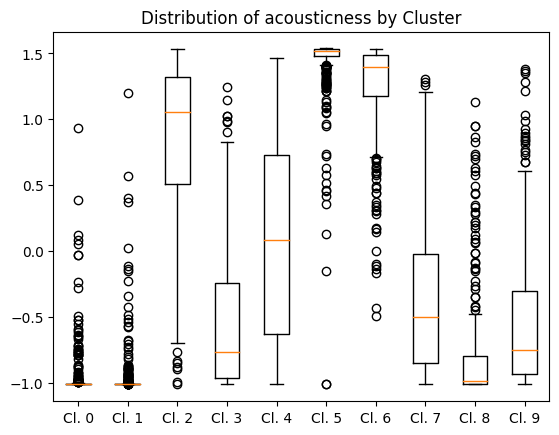

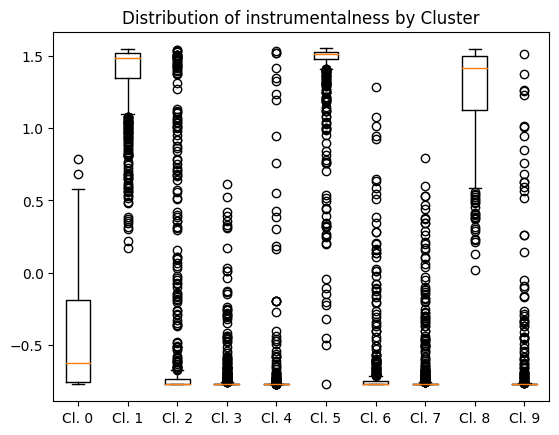

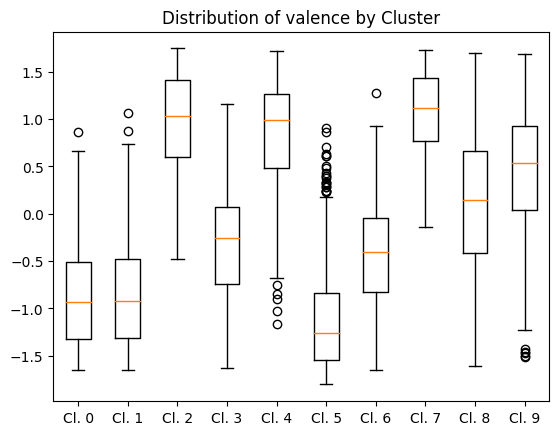

In [43]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import set_config

# Attach the cluster output to the original DataFrame
scaled_features_df["cluster"] = clusters

# Create boxplots for each feature
for feature in scaled_features_df.columns[:-1]:  # Exclude the 'cluster' column
    plt.figure()
    plt.boxplot([scaled_features_df[feature][scaled_features_df['cluster'] == i] for i in range(10)],
                labels=[f'Cl. {i}' for i in range(10)])
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

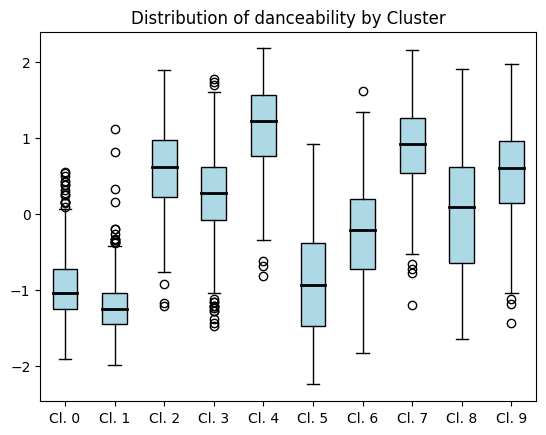

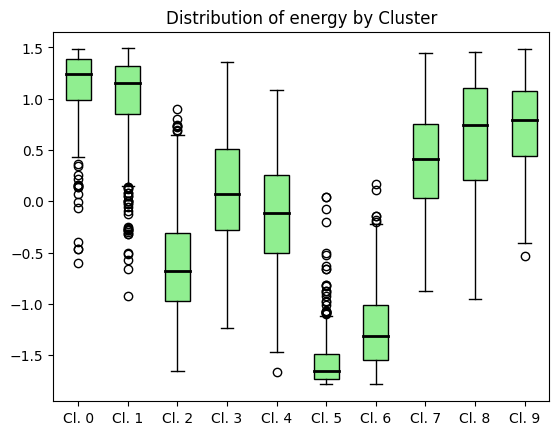

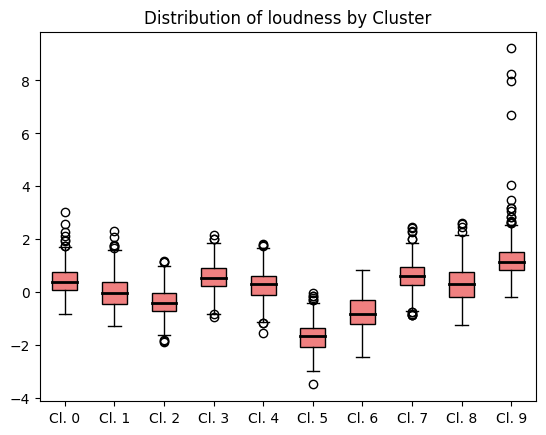

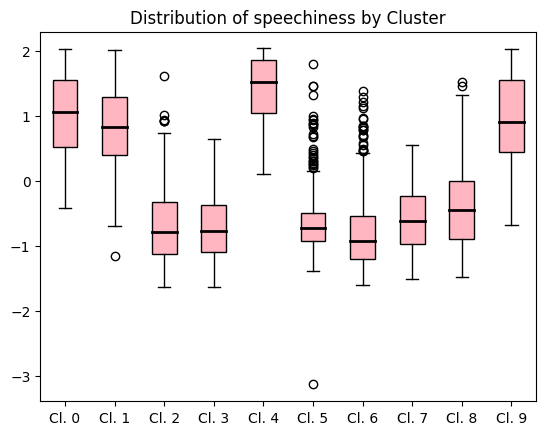

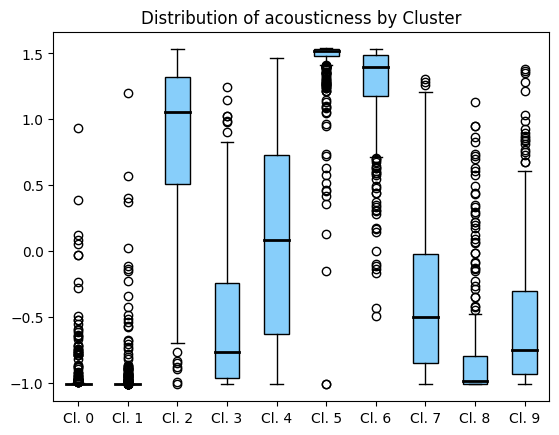

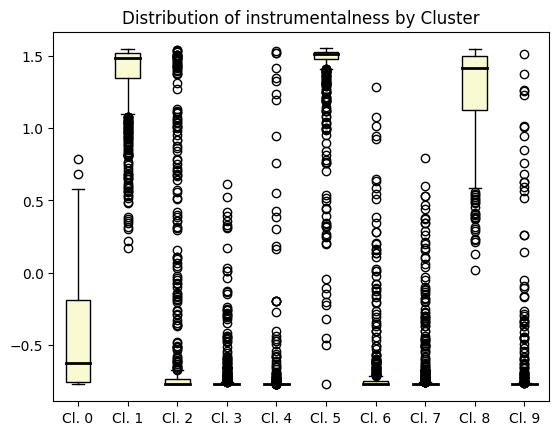

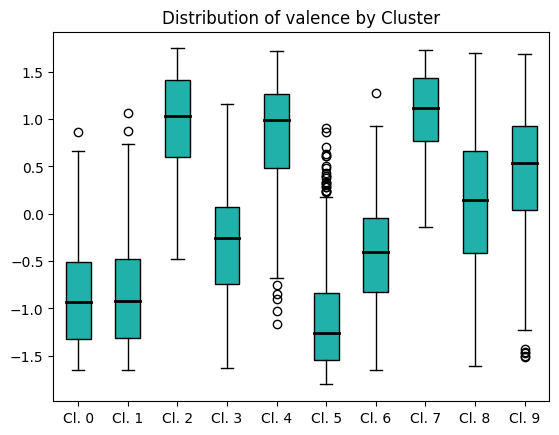

In [45]:
import matplotlib.pyplot as plt

# Assuming scaled_features_df is already defined
# Create boxplots for each feature with custom colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightskyblue',
          'lightgoldenrodyellow', 'lightseagreen', 'lightsalmon', 'lavender', 'lightgray']  # Define your desired colors

# Create boxplots for each feature
for i, feature in enumerate(scaled_features_df.columns[:-1]):  # Exclude the 'cluster' column
    plt.figure()
    bp = plt.boxplot([scaled_features_df[feature][scaled_features_df['cluster'] == j] for j in range(10)],
                     labels=[f'Cl. {j}' for j in range(10)],
                     patch_artist=True)

    # Customize the colors of the boxplots
    for patch in bp['boxes']:
        patch.set_facecolor(colors[i])  # Set box fill color
        patch.set_edgecolor('black')  # Set box outline color

    for median in bp['medians']:
        median.set(color='black', linewidth=2)  # Customize median line

    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


In [50]:
# cluster 5 and 8 have the highest danceability and we need to verify it
# Filter rows that belong to cluster 5
cluster_5_data = scaled_features_df[scaled_features_df['cluster'] == 5]

# Filter rows that belong to cluster 8
cluster_8_data = scaled_features_df[scaled_features_df['cluster'] == 8]

# Display the first few rows of each filtered DataFrame to verify
print("Cluster 5 Data:")
print(cluster_5_data.tail())

Cluster 5 Data:
                                                    danceability    energy  \
name                                                                         
1812 Festival Overture, Op. 49: 1812 Overture, ...     -1.392809 -1.695160   
Winter Fragments pour ensemble instrumental, so...     -1.452979 -1.648739   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...     -1.994836 -1.785392   
Serenade For Strings In E, Op.22, B. 52: 1. Mod...     -1.687319 -1.760617   
Ravel: Boléro, M. 81                           ...     -0.726526 -1.723901   

                                                    loudness  speechiness  \
name                                                                        
1812 Festival Overture, Op. 49: 1812 Overture, ... -1.867615    -0.521426   
Winter Fragments pour ensemble instrumental, so... -1.751722    -0.639506   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... -2.914038    -0.670914   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... -

**Summary:** "Aquarela Do Brasil" from Cluster is very suitable for dancing (Spanish), "Winter Fragments pour ensemble instrumental" is not suitable for dance at all, only instrumental weird sound. -->have to add the number of clusters?



